### Условие задачи

**Дано:**
- двумерная решетка молекул, расположенных в узлах кристаллической решетки, размеров $L_x \times L_y$ с периодическими границами
- каждая молекула обладает спином +1 или -1
- межмолекулярное взаимодействие описывается константами $J_{ij} = 1$
- модель Изинга


**Требуется:**
- согласно модели Изинга рассчитать нормированное значение средней энергии $\frac{\langle E \rangle}{Lx Ly}$ для указанной решетки молекул при:
    - размерах решетки $L_x \in [2, 3, ..., 8]$, $L_y = 4$
    - температурах $kT \in [1.0, 5.0)$ с шагом $0.1$
- сохранить массив средних энергий при помощи `np.save`
- вывести время расчета каждой итерации по $Lx$ или по $k T$
- отобразить цветовую карту:
    - ось абсцисс - $L_x$,
    - ось ординат - $k T$,
    - цветом отобразить нормированное значение средней энергии $\frac{\langle E \rangle}{Lx Ly}$,
    - подписать оси,
    - отобразить цветовую шкалу (`colorbar`),
    - засечки должны соответствовать значениям $Lx, kT$.
- к каждой функции добавить `docstring` с описанием того, что функция делает, всех параметров и возвращаемого значения    

**Описание:**

**Одномерный случай**

Модель Изинга является моделью магнетика. Пусть этот магнетик состоит из молекул, расположенных в узлах регулярной решетки. Пусть всего таких узлов будет $N$ штук, с индексами $i=1,\ldots, N$.

Предположим, что каждая молекула может быть представлена в виде магнитной стрелки, которая всегда либо направлена вдоль некоторой заданной оси, либо в противоположном направлении. То есть каждая молекула $i$ имеет две конфигурации, которые можно описывать с помощью "спиновой" переменной $\sigma_i$. Эта переменная принимает значение $+1$ (параллельно оси, спин направлен вверх) и $-1$ (антипараллельно оси, спин направлен вниз).

Пусть $\sigma = \{\sigma_1, \sigma_2, \ldots, \sigma_N\}$ обозначает набор значений всех $N$ спинов. Имеется $2^N$ различных наборов $\sigma$, и каждый из них описывает некоторое состояние системы.

Гамильтониан системы  состоит из двух частей: первая $E_0$ включает вклад межмолекулярных сил внутри магнетика, а вторая $E_1(\sigma)$ вклад от взаимодействий каждого спина с внешним магнитным полем (здесь считается нулевым).
$$H(\sigma)=E_0(\sigma)+E_1(\sigma)$$

В любой физической системе мы предполагаем все взаимодействия инвариантными по отношению к обращению времени, что означает инвариантность $E$ при изменении знаков всех полей и намагниченностей. Энергия должна быть четной функцией от $\sigma$:
$$E_0(\sigma_1,\ldots, \sigma_N)=E_0(-\sigma_1,\ldots, -\sigma_N)$$

Энергия системы при нулевом внешнем магнитном поле равна сумме произведений **соседних** спинов на константы взаимодействия $J_{ij}$
$$E(\sigma) = -\sum_{i} J_{i,i+1}\sigma_{i}\sigma_{i+1} $$

Вероятность находиться в состоянии $\sigma$
$$P(\sigma)=\frac{e^{-\beta E(\sigma)}}{Z},$$
	где $Z = \sum_{\sigma} e^{-\beta E(\sigma)}-$ статистическая сумма, $\beta = \frac{1}{k T}-$ обратная температура, $k-$ константа Больцмана.

Средняя энергия системы
$$\langle E \rangle = \frac{1}{Z}\sum_{\{\sigma \}} E(\sigma)e^{-\frac{E(\sigma)}{kT}}$$
рассчитывается по всевозможным состояниям системы, т.е. всевозможным наборам $\sigma$.

**Двумерный случай**

В случае двумерной решетки энергия системы при нулевом внешнем магнитном поле вычисляется следующим образом:
$$E(\sigma) = -\sum_{i,j} J_{ij}(\sigma_{i,j}\sigma_{i+1,j} + \sigma_{i,j}\sigma_{i,j+1})$$


**Проверка корректности результатов**

Нормированное значение средней энергии при температурах $kT \in [1.0, 5.0)$:

- для $L_x=4$

```
 -1.99715844 -1.99396091 -1.98856632 -1.98016965 -1.96786355 -1.95064256
 -1.9274244  -1.89711215 -1.85871667 -1.81153907 -1.75538029 -1.69071311
 -1.61874282 -1.54131149 -1.46065977 -1.37911648 -1.29880759 -1.22145424
 -1.14828469 -1.0800446  -1.01706963 -0.95938399 -0.90679838 -0.85899291
 -0.8155803  -0.77615005 -0.74029707 -0.70763857 -0.67782287 -0.65053286
 -0.62548613 -0.60243323 -0.58115501 -0.56145948 -0.5431787  -0.52616582
 -0.5102923  -0.49544555 -0.48152673 -0.46844889
```

- для $L_x=5$

```
 -1.99715893 -1.99396296 -1.98857263 -1.98018387 -1.96788363 -1.95063964
 -1.92729692 -1.89661121 -1.85735639 -1.80853133 -1.74965024 -1.68103752
 -1.60399878 -1.52075577 -1.43412763 -1.3470633  -1.26219309 -1.18153361
 -1.10638872 -1.03740747 -0.97472647 -0.918132   -0.86720255 -0.82141645
 -0.78022445 -0.74309384 -0.70953215 -0.67909749 -0.65140075 -0.62610332
 -0.60291264 -0.58157686 -0.56187952 -0.54363452 -0.52668165 -0.51088271
 -0.49611811 -0.48228409 -0.46929029 -0.45705774
```

**Материалы:**
- [Бэкстер Р., Вольский Е. П., Дайхин Л. И. Точно решаемые модели в статистической механике](https://yadi.sk/i/2oY4c0bL08pNiw)
- [Пример хорошего `docstring`](https://github.com/numpy/numpy/blob/v1.21.0/numpy/linalg/linalg.py#L313-L395)
- [Зиннуров Б.Д., Якименко В.Я. Магнитные свойства модели Изинга в низких размерностях (МКР)](https://miem.hse.ru/data/2018/05/24/1149431665/model_Izinga_-_Zinnurov_Yakimenko.pdf)


**Правила оценивания:**

- оценка за корректно выполненный расчет для количества молекул в цепочке $L_x$, баллов из 100:
```
    Lx    =   2,   3,   4,   5,    6,    7,     8
    g(Lx) = 1.0, 1.8, 3.3, 6.4, 12.6, 24.9,  50.0
```
    
- штрафы $p(i)$, баллов:
    - не выведено время расчета - 20
    - не выведены значения средней энергии - 20
    - не построена карта - 20
    - отсутствует `docstring` - 20
    - менее значимые недоработки - 10


- итоговая оценка за задание = $\sum_{Lx=2}^{8}{g(Lx)} - \sum_{i}{p(i)}$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import trange

from numba import njit, prange

In [ ]:
@njit(parallel = True)
def calc_energy(lx, ly, t):
    """
    Функция для генирации массива спинов состоящий из чисел -1 и 1, bспользуя битовую маску.
    Данное преобразование проводится с помощью бинарной операции "побитовое и" &.
    Мы переберем все возможные конфигурации спинов для заданных размеров, учитывая что
    функция энергия четная.После подсчета спинов мы рассчитываем среднюю энергию по заданной формуле

    Параментры
    ----------
    t - температура.
    Lx - длина решетки по оси x.
    Ly - длина решетки по оси y.

    Возвращаемое значение
    ---------------------
    Массив размера спинов Lx * Ly спинов.
    """
    n_ind = lx*ly
    energy = 0
    prob = 0
    for k in prange(2**n_ind):
      bit_mask = np.int64(k)
      e_k = 0
      spin = np.zeros(n_ind)
      for i in range(n_ind):
        if bit_mask & 1 == 0:
          spin[i] = -1
        else:
          spin[i] = 1
        bit_mask = bit_mask >> 1
      spins = spin.reshape(lx, ly)
      for i in range(-1, lx-1):
        for j in range(-1, ly-1):
          e_k -= spins[i, j] * (spins[i, j + 1] + spins[i + 1, j])
      energy += e_k*np.exp(-e_k / t)
      prob += np.exp(-e_k / t)
    return energy/(prob*(lx*ly))

In [ ]:
lx_arr1 = np.arange(2, 9, 1).astype(int)
t_arr1 = np.arange(1, 5.1, 0.1)
res_enregies = np.zeros((len(lx_arr1), len(t_arr1)))
start = 0
for lx_ind in range(len(lx_arr1)):
  start = time.time()
  for t_ind in range(len(t_arr1)):
    lx = lx_arr1[lx_ind]
    t = t_arr1[t_ind]
    res_enregies[lx_ind, t_ind] = calc_energy(lx, 4, t)
  end = time.time()
  print(f"для {lx_arr1[lx_ind]} получилось {end- start}")
np.save("result.npy", res_enregies)

для 2 получилось 0.5459330081939697
для 3 получилось 0.004477024078369141
для 4 получилось 0.027543067932128906
для 5 получилось 0.40592002868652344
для 6 получилось 5.700941801071167
для 7 получилось 177.07608723640442
для 8 получилось 2971.8360669612885


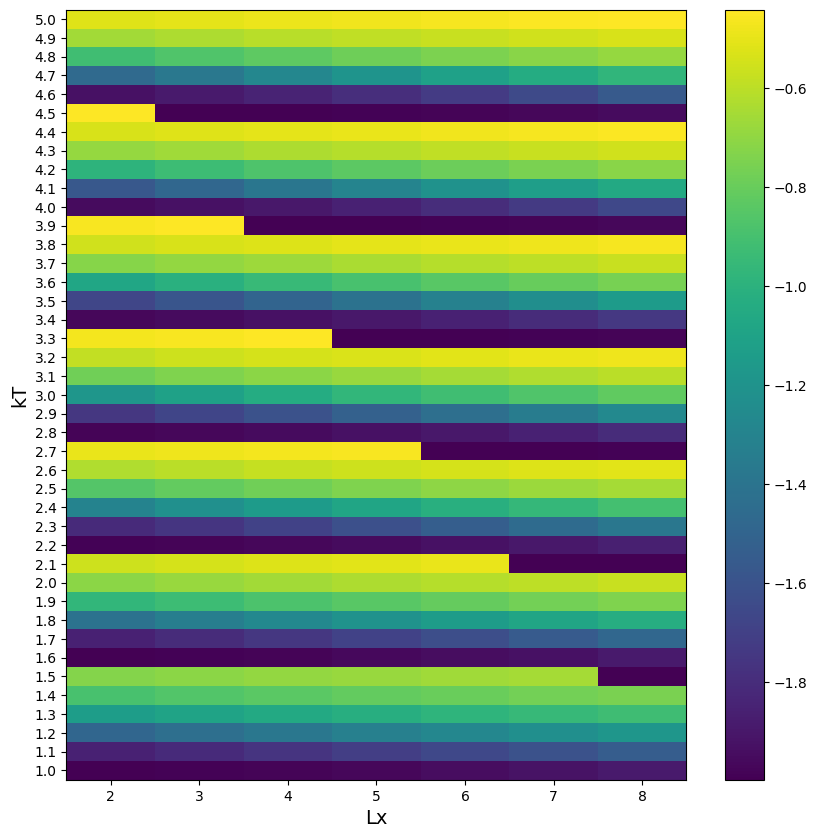

In [ ]:
lx_arr1 = np.arange(2, 9, 1)
t_arr1 = np.arange(1.0, 5.1, 0.1)
x, y = np.meshgrid(lx_arr1, t_arr1)
plt.figure(figsize=(10, 10))
plt.pcolormesh(x, y, new_data.reshape(t_arr1.size,lx_arr1.size))
plt.xlabel('Lx', fontsize=14)
plt.ylabel('kT', fontsize=14)
plt.xticks(lx_arr1)
plt.yticks(t_arr1)
plt.colorbar()
#plt.title('Цветовая карта нормированной средней энергии', fontsize=14)
plt.show()


In [ ]:
new_data = np.load("/Users/fedorkomarov/result.npy")